In [1]:
#importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to enable plotting graphs in the notebook
%matplotlib inline

In [3]:
#reading the data
cars = pd.read_csv("Car-mpg- Dataset.csv")
cars.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
#dropping "car_name" as it is not useful
cars.drop("car_name",axis = 1, inplace = True)
cars.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [5]:
#as algorithm may think some relationship beltween the numbers in a categorical variable, we are replacing the categorical variables with names
cars["origin"] = cars["origin"].replace({1: "america", 2:"europe", 3: "asia"})
cars.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


In [6]:
#now as the machine learning models cannot handle string type in data, we are one hot encoding it.
cars = pd.get_dummies(cars,columns=["origin"])
cars.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [7]:
cars.describe()

,mpg,cyl,disp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#we can see that the hp column is not there in the above describe function, so there must be something wrong with that column. Hence checking the unique values
cars["hp"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
#as there is a unique value "?" in the dataset, hp column is not able to appear in the describe function
#replacing ? with NaN so we can delete rows if feasible or impute median in that missing values
cars["hp"].replace("?",np.nan,inplace = True)

In [10]:
#To see the number of NaN
cars[cars["hp"].isna()]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [11]:
#checking if we have NaN in any other columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              392 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
 10  origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 26.2+ KB


In [12]:
#We have only 398 rows of data and 6 rows are empty in "hp". So instead of deleting 1.5% of data we will replace the null values with the median values.
#we are replacing with median instead of mean because "hp" column is having NaN and no longer a numerical column. So we use median instead of mean. This also helps in handling outliers
cars["hp"].fillna(cars["hp"].median(), inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
 10  origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 26.2+ KB


In [13]:
#Changing the data type of the "hp" column
cars["hp"] = cars["hp"].astype("float64")
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    float64
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_america  398 non-null    uint8  
 9   origin_asia     398 non-null    uint8  
 10  origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 26.2 KB


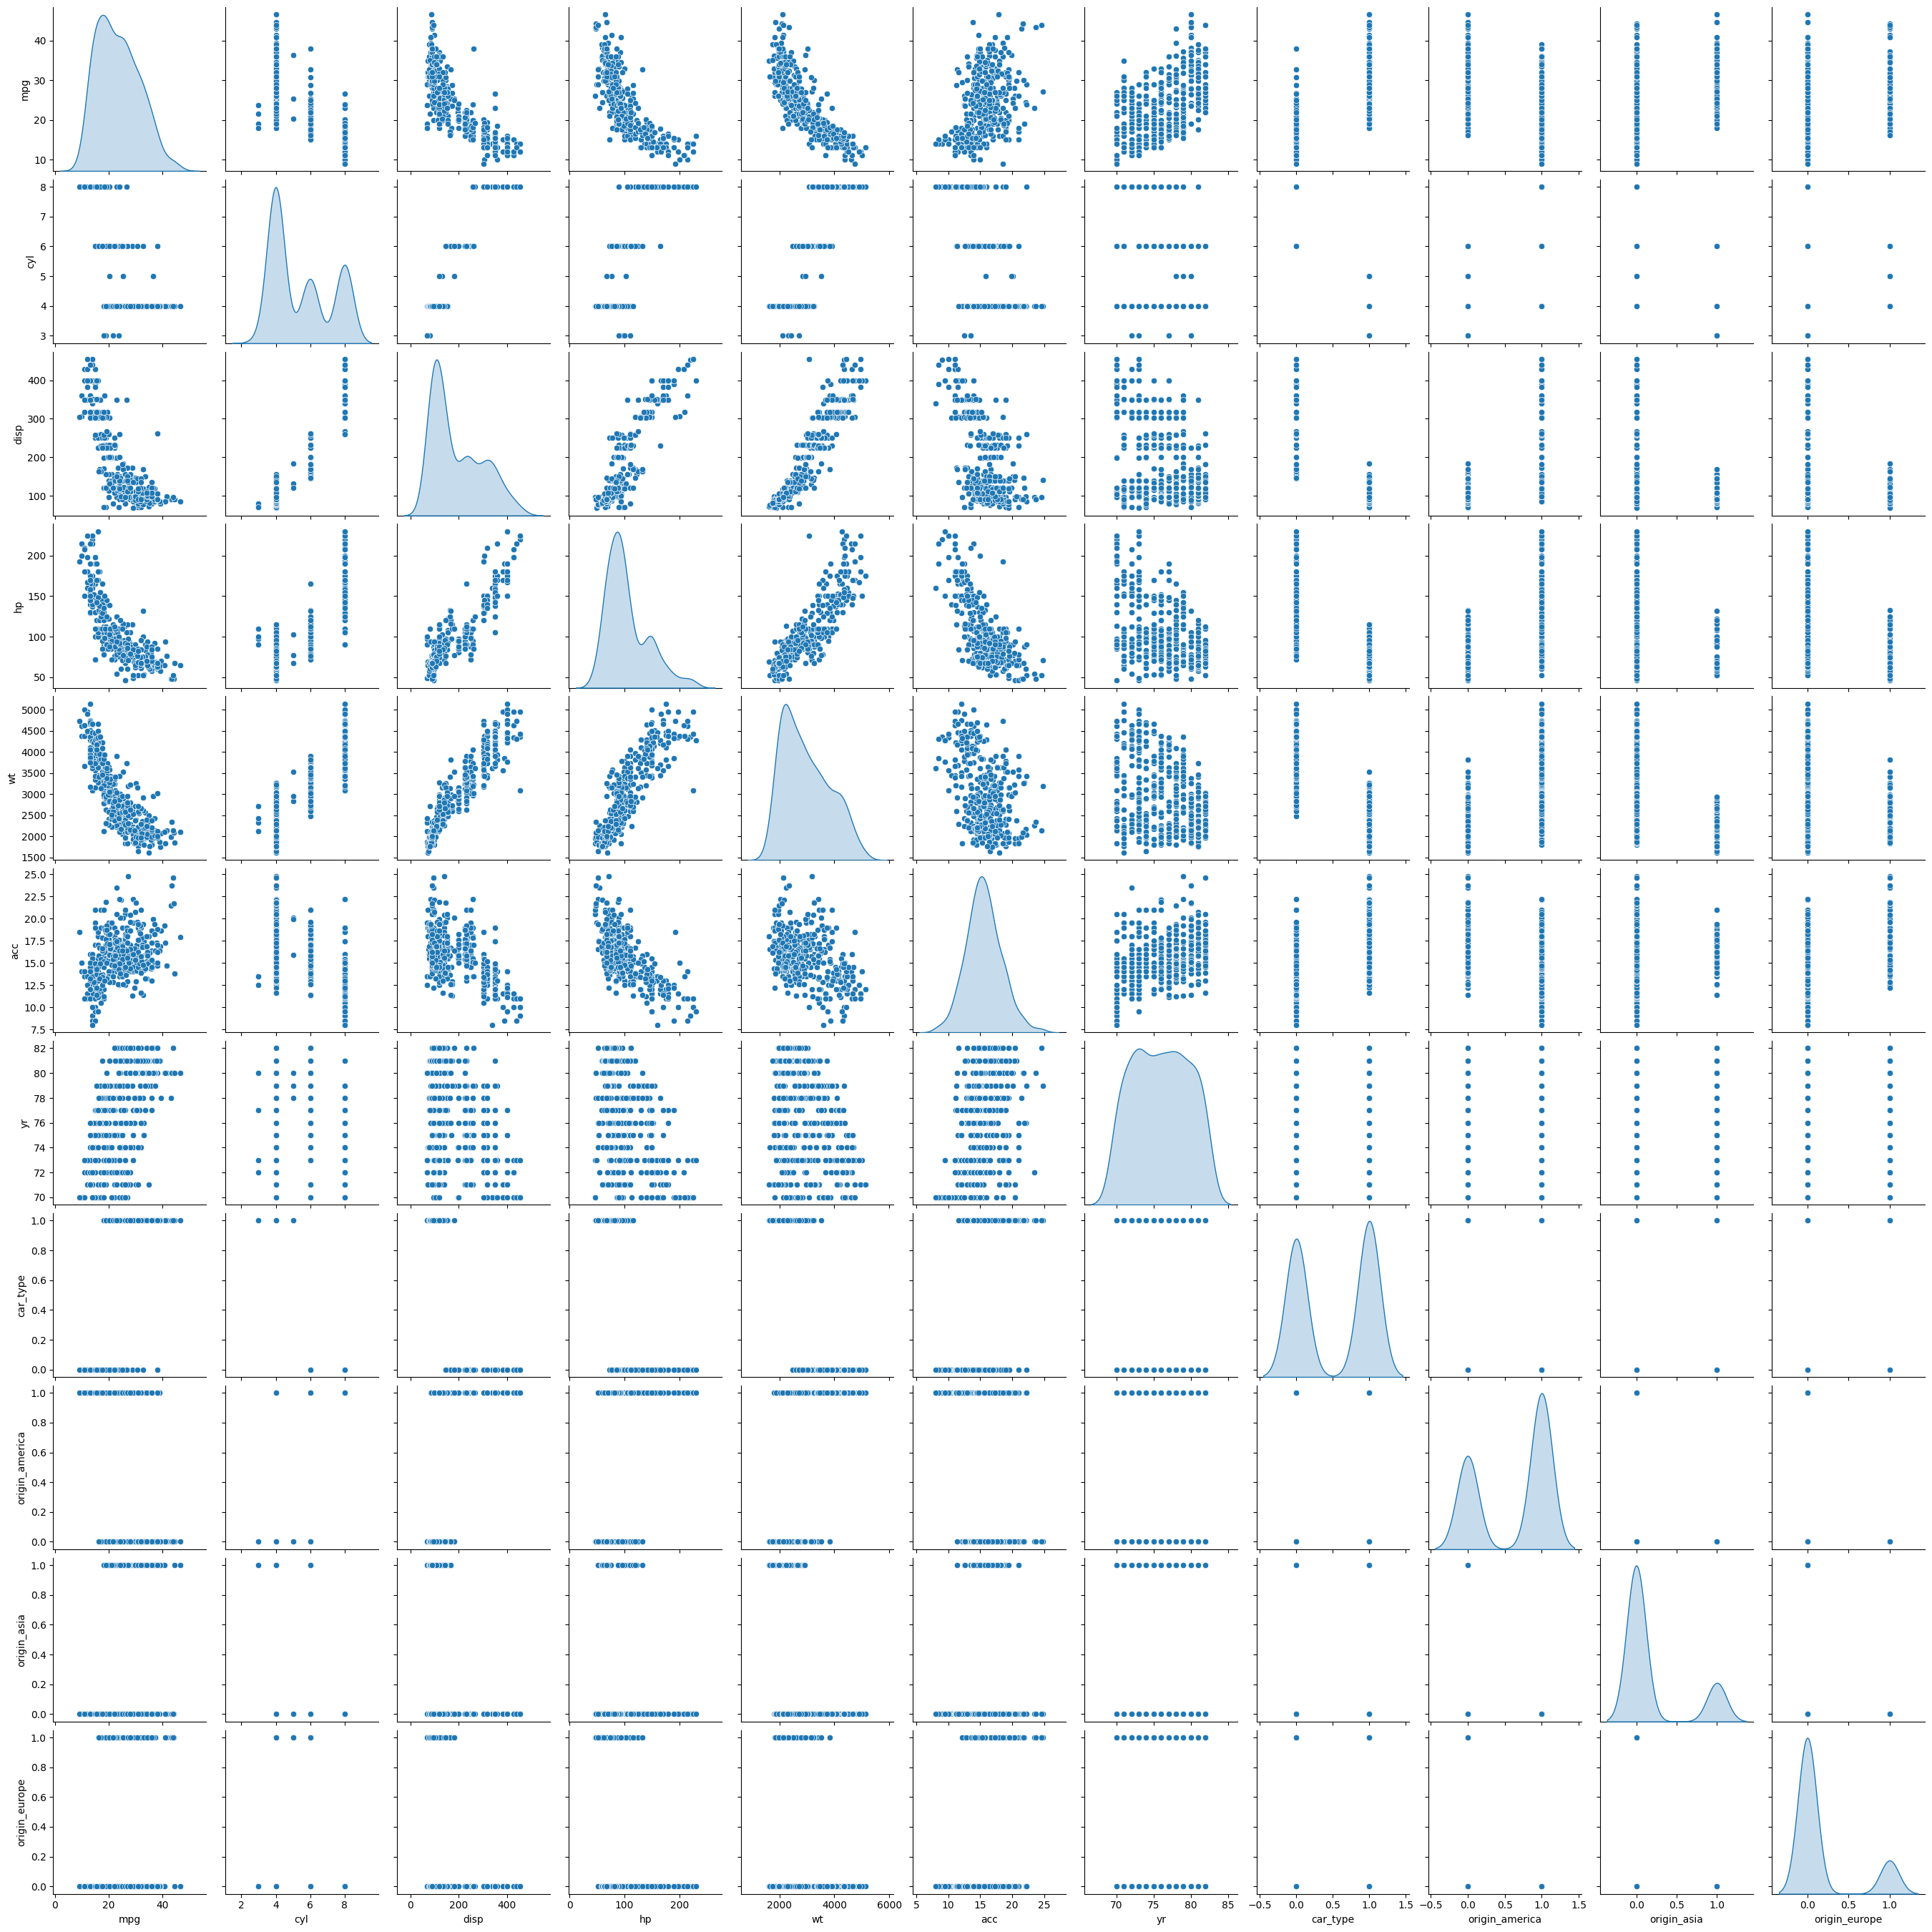

In [14]:
#we can do correlation analysis among the different dimensions and also each dimension with the dependent dimension
sns.pairplot(cars, diag_kind = 'kde')

In [15]:
#The data distribution across various dimensions except 'Acc' do not look  normal
#Close observation between 'mpg' and other attributes indicate the relationship is not really linear
#copying all the independent variables in X and dependent variable in y to build a model
X = cars.drop('mpg', axis = 1)
y = cars[['mpg']]
X.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [16]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [17]:
#lets use sklearn to split the data into test and train 
# we will seed  the random state so the we will get the same results everytime we run
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

In [18]:
#iteration - 1
#invoking the LinearReression model to find the best fit hyperplane on training data
regression_model = LinearRegression()

In [19]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [20]:
#To see all the coefficients the model learnt
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 1.4750732919168092
The coefficient for disp is 0.024349322002431492
The coefficient for hp is -0.04686191039325275
The coefficient for wt is -0.006564163296278444
The coefficient for acc is 0.041702279188100405
The coefficient for yr is 0.7938975478842015
The coefficient for car_type is 5.966597439861036
The coefficient for origin_america is -1.4243481095472286
The coefficient for origin_asia is 0.652111924959871
The coefficient for origin_europe is 0.7722361845873518


In [21]:
#To see the intercept
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

The intercept for the model is -28.235395568497513


In [22]:
# we are seeing some different relationships here. for eg, by pairplots we saw that as cylinders increase mpg should go down but from the model, for every unit increase in cylinders, the mpg increases by 1.4 times which seems incorrect from what we saw in the pair plot
# first we will test the model on the test data to see the R2 or coefficient of determinant
regression_model.score(X_test, y_test)

0.8513421387780062

In [23]:
from ipywidgets import interaction
#Iteration - 2
#As on many dimensions the relationship is not linear, let us try using polynomial model
#From preprocessing libraries, we import polynomialfeatures and defining max degree 2 and interactive to True
#Creates these features only when those independent variables are interating with each other

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2, interaction_only = True)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

#the above creates many more polynomial features

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_, y_train)
#the above is going to give us a best fit hyper surface
y_pred = poly_clf.predict(X_test_)
print(poly_clf.score(X_test_, y_test))

0.8626121611923278


In [24]:
#the r2 value didnt gone up
print(X_train.shape)
print(X_train_.shape)

(278, 10)
(278, 56)


In [25]:
#with this 56 dimensions we must be facing curse of dimensionality
#lack of data points is the issue
#we can take only few cols with curvilinear relationship and do the model